<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
    



</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_plans = pd.read_csv("/datasets/megaline_plans.csv")
df_users = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.sample(2)




,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Noto un par de problemas en la informacion:

1: Se indica la cantidad de megas que incluye tu plan, pero despues te indica un costo por gb, esto podria generar confusion
2: Se indica el costo del consumo de volumen adicional pero no se indica el costo del propio paquete, hay que agregarlo como una columna nueva 
3: El nombre del plan esta almacenado como objeto, debe ser cambiado a una variable de texto (string) para mas adelante poder acceder a ella y manipularla de una manera mas adecuada 

Se debe manejar todo en las mismas unidades por lo que se consideraran gb en ambos casos para un control mas preciso, ademas de hacer la conversion del nombre del plan a texto para tener mejor control sobre ella y se agregara la nueva columna con el cobro mensual que corresponde a cada uno de los planes 


## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
df_plans["mb_per_month_included"]=df_plans["mb_per_month_included"]/1024
df_plans = df_plans.rename(columns={"mb_per_month_included": "gb_per_month_included"})
df_plans["plan_name"] = df_plans["plan_name"].astype("string")
df_plans["gb_per_month_included"] = df_plans["gb_per_month_included"].astype("int")
df_plans.sample(2)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:

df_plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
muestra_usuarios = df_users.head(10)
print(muestra_usuarios)

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

-Tenemos que convertir la informacion a string practicamente en todas las columnas

-En la columna churn_date debemos reemplazar los datos nulos por la leyenda "active" o algo similar que indique que el usuario aun esta con plan activo

-La region seria mejor separarla en columas que indiquen la region metropolitana como ciudades principales, despues como estados que la rodean, y el tipo de area. de esta forma tendremos un filtro adicional que nos ayude a conocer mas a nuestros usuarios

-Convertir la columna de fecha de registro en formato de fecha

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
columnas_corregir = ["first_name","last_name","city","plan"]
df_users[columnas_corregir]=df_users[columnas_corregir].astype("string")
df_users["reg_date"]=pd.to_datetime(df_users["reg_date"], format= "%Y-%m-%d", errors="coerce")
df_users["churn_date"]=df_users["churn_date"].fillna("active_user")
df_users["churn_date"]=pd.to_datetime(df_users["churn_date"], format= "%Y-%m-%d", errors ="ignore")

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    string        
 2   last_name   500 non-null    string        
 3   age         500 non-null    int64         
 4   city        500 non-null    string        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    string        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1), string(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
df_users[["city", "state(s)"]] = df_users["city"].str.split(',', expand=True)
df_users = df_users.rename(columns={"plan": "plan_name"})
df_users = df_users.reindex(columns=["user_id","first_name","last_name","age","city","state(s)","plan_name","reg_date","churn_date"])

df_users.sample(10)

,user_id,first_name,last_name,age,city,state(s),plan_name,reg_date,churn_date
9,1009,Gerry,Little,19,San Jose-Sunnyvale-Santa Clara,CA MSA,surf,2018-04-22,active_user
52,1052,Edmond,Hopkins,47,Houston-The Woodlands-Sugar Land,TX MSA,surf,2018-03-05,active_user
101,1101,Sage,Conley,27,Washington-Arlington-Alexandria,DC-VA-MD-WV MSA,surf,2018-02-08,active_user
183,1183,Jermaine,Gallegos,71,Chicago-Naperville-Elgin,IL-IN-WI MSA,surf,2018-07-20,active_user
72,1072,Seymour,Spence,66,Dallas-Fort Worth-Arlington,TX MSA,surf,2018-07-12,active_user
357,1357,Ria,Beach,61,Baton Rouge,LA MSA,surf,2018-05-30,active_user
214,1214,Emil,Robles,34,San Francisco-Oakland-Berkeley,CA MSA,ultimate,2018-01-01,active_user
438,1438,Harvey,Brooks,36,Orlando-Kissimmee-Sanford,FL MSA,surf,2018-06-15,active_user
286,1286,Casie,Castaneda,52,New Haven-Milford,CT MSA,surf,2018-12-07,active_user
359,1359,Sherley,Norris,33,Colorado Springs,CO MSA,surf,2018-02-08,active_user


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
df_calls.head(20)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

La columna id la renombraremos como id_call solo para especificar que el codigo que tenemos ahi es el de la llamada realizada, para evitar confusiones con el id_user.

considero que el tiempo de llamada debe establecerse en minutos y segundos para un mejor entendimiento del tiempo real, pero por fines de analisis y para facilitar el proceso, dejaremos decimales hasta el final del proceso donde agregaremos una columna que nos muestre el tiempo tambien en formato horario


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
df_calls["call_date"]=pd.to_datetime(df_calls["call_date"], format= "%Y-%m-%d", errors="coerce")

df_calls.head(20)





,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
df_calls = df_calls.rename(columns={"id": "call_id"})

df_calls.sample(20)

,call_id,user_id,call_date,duration
91281,1329_46,1329,2018-12-02,10.02
103087,1365_283,1365,2018-11-27,9.96
113826,1400_166,1400,2018-09-29,0.00
22637,1082_735,1082,2018-09-23,10.24
94453,1336_317,1336,2018-11-19,17.23
78633,1281_323,1281,2018-08-25,2.56
29398,1111_23,1111,2018-10-13,1.13
64914,1236_186,1236,2018-11-23,8.92
124166,1439_34,1439,2018-09-02,7.29
75768,1268_272,1268,2018-09-28,3.78


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(10)


,id,user_id,message_date
6051,1055_169,1055,2018-05-25
71407,1466_59,1466,2018-12-01
53480,1340_6,1340,2018-11-01
35906,1236_186,1236,2018-07-04
60241,1381_354,1381,2018-09-30
37713,1249_254,1249,2018-08-02
28460,1174_250,1174,2018-11-09
15137,1101_194,1101,2018-12-18
5977,1055_95,1055,2018-11-18
69867,1454_229,1454,2018-11-06


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Necesitamos hacer un conteo de mensajes por usuario por mes para conocer el comportamiento del uso de los mismos, asi que tenemos que agregar una columna que nos lleve el conteo de mensajes que se mandan durante el mes

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
df_messages["message_date"]=pd.to_datetime(df_messages["message_date"], format= "%Y-%m-%d", errors="coerce")
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
df_messages["enviados_acumulados"] = df_messages.groupby("user_id").cumcount() + 1
df_messages = df_messages.rename(columns={"id": "message_id"})
df_messages.sample(10)

,message_id,user_id,message_date,enviados_acumulados
34667,1220_183,1220,2018-06-05,168
54098,1343_182,1343,2018-12-31,179
23388,1142_36,1142,2018-12-08,26
17743,1115_267,1115,2018-11-23,42
6953,1057_277,1057,2018-12-07,278
51475,1335_64,1335,2018-11-10,64
33843,1213_43,1213,2018-12-02,34
29516,1181_199,1181,2018-10-15,147
1737,1017_87,1017,2018-11-21,78
2514,1028_432,1028,2018-03-08,420


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(10)


,id,user_id,session_date,mb_used
102246,1490_61,1490,2018-12-08,621.80
86752,1403_100,1403,2018-05-15,515.61
83488,1390_43,1390,2018-07-09,22.80
11499,1056_166,1056,2018-10-22,0.00
99311,1467_448,1467,2018-09-01,181.77
69684,1325_86,1325,2018-12-10,59.12
58682,1263_486,1263,2018-12-14,179.55
72146,1336_172,1336,2018-05-17,514.27
37991,1171_362,1171,2018-11-19,237.36
48074,1214_448,1214,2018-05-14,523.90


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
df_internet["session_date"]=pd.to_datetime(df_internet["session_date"], format= "%Y-%m-%d", errors="coerce")
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
df_internet["gb_used"] = (df_internet["mb_used"] / 1024).round(2)
df_internet = df_internet.rename(columns={"id": "session_id"})
df_internet.sample(10)

,session_id,user_id,session_date,mb_used,gb_used
49782,1222_281,1222,2018-08-09,252.87,0.25
61636,1280_154,1280,2018-10-13,254.19,0.25
76718,1359_407,1359,2018-07-10,519.81,0.51
3371,1018_374,1018,2018-12-13,696.77,0.68
70962,1331_213,1331,2018-11-07,0.00,0.00
13792,1064_240,1064,2018-07-08,168.19,0.16
2521,1011_261,1011,2018-12-02,455.15,0.44
45011,1199_316,1199,2018-11-27,46.52,0.05
93392,1435_158,1435,2018-11-02,505.66,0.49
31178,1142_178,1142,2018-09-06,981.65,0.96


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodomente
</div>


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.


df_calls["month"] = df_calls["call_date"].dt.to_period("m")

calls_per_user_month = df_calls.groupby(["user_id", "month"])["call_id"].count().reset_index()

calls_per_user_month = calls_per_user_month.rename(columns={"call_id": "num_calls"})

calls_per_user_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   user_id    2258 non-null   int64    
 1   month      2258 non-null   period[M]
 2   num_calls  2258 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 53.0 KB


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#creamos una nueva columna que nos indique el mes

df_calls["month"] = df_calls["call_date"].dt.to_period("m")

minutes_per_user_month = df_calls.groupby(["user_id", "month"])["duration"].sum().reset_index()

minutes_per_user_month = minutes_per_user_month.rename(columns={"duration": "used_minutes"})

minutes_per_user_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   user_id       2258 non-null   int64    
 1   month         2258 non-null   period[M]
 2   used_minutes  2258 non-null   float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 53.0 KB


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_messages["month"] = df_messages["message_date"].dt.to_period("m")

messages_per_user_month = df_messages.groupby(["user_id", "month"])["message_id"].count().reset_index()

messages_per_user_month = messages_per_user_month.rename(columns={"message_id": "sent_messages"})

messages_per_user_month.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   user_id        1806 non-null   int64    
 1   month          1806 non-null   period[M]
 2   sent_messages  1806 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 42.5 KB


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

df_internet["month"] = df_internet["session_date"].dt.to_period("m")

data_per_user_month = df_internet.groupby(["user_id", "month"])["gb_used"].sum().reset_index()

data_per_user_month = data_per_user_month.rename(columns={"gb_used": "total_gb_used"})

data_per_user_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   user_id        2277 non-null   int64    
 1   month          2277 non-null   period[M]
 2   total_gb_used  2277 non-null   float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 53.5 KB


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_fusioned = pd.merge(calls_per_user_month,minutes_per_user_month, on=["user_id","month"], how="left") 
df_fusioned_1 = pd.merge(data_per_user_month,messages_per_user_month, on=["user_id","month"], how="left")

df_fusioned_2 = pd.merge(df_fusioned,df_fusioned_1,on=["user_id","month"],how="left")
df_fusioned_2.head(20)



,user_id,month,num_calls,used_minutes,total_gb_used,sent_messages
0,1000,2018-12,16,116.83,1.85,11.0
1,1001,2018-08,27,171.14,6.76,30.0
2,1001,2018-09,49,297.69,12.99,44.0
3,1001,2018-10,65,374.11,21.77,53.0
4,1001,2018-11,64,404.59,18.08,36.0
5,1001,2018-12,56,392.93,18.92,44.0
6,1002,2018-10,11,54.13,6.40,15.0
7,1002,2018-11,55,359.76,18.90,32.0
8,1002,2018-12,47,363.24,14.08,41.0
9,1003,2018-12,149,1041.00,26.40,50.0


In [29]:
# Añade la información de la tarifa
df_users_reducido = df_users[["user_id","plan_name"]]
df_plans_reducido = df_plans[["usd_monthly_pay", "plan_name"]]
df_fusioned_3 = pd.merge(df_fusioned_2,df_users_reducido, on="user_id", how="left")
df_resume = pd.merge(df_fusioned_3,df_plans_reducido, on="plan_name",how="left")
df_resume.head(10)





,user_id,month,num_calls,used_minutes,total_gb_used,sent_messages,plan_name,usd_monthly_pay
0,1000,2018-12,16,116.83,1.85,11.0,ultimate,70
1,1001,2018-08,27,171.14,6.76,30.0,surf,20
2,1001,2018-09,49,297.69,12.99,44.0,surf,20
3,1001,2018-10,65,374.11,21.77,53.0,surf,20
4,1001,2018-11,64,404.59,18.08,36.0,surf,20
5,1001,2018-12,56,392.93,18.92,44.0,surf,20
6,1002,2018-10,11,54.13,6.40,15.0,surf,20
7,1002,2018-11,55,359.76,18.90,32.0,surf,20
8,1002,2018-12,47,363.24,14.08,41.0,surf,20
9,1003,2018-12,149,1041.00,26.40,50.0,surf,20


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
df_consumos = pd.merge(df_fusioned_3,df_plans, on="plan_name",how="left")
df_consumos = df_consumos.reindex(columns=["user_id","plan_name","usd_monthly_pay","month","num_calls","used_minutes","minutes_included","usd_per_minute","total_gb_used","gb_per_month_included","usd_per_gb","sent_messages","messages_included","usd_per_message"])

df_ingresos = pd.DataFrame({
    "user_id" : df_consumos["user_id"], 
    
    "month" : df_consumos["month"],
   
    "cuota_mensual": df_consumos["usd_monthly_pay"],
   
    "minutos_excedidos": np.where(
    df_consumos["used_minutes"] - df_consumos["minutes_included"] < 0,
    0,
    (df_consumos["used_minutes"] - df_consumos["minutes_included"]).round(2)),
   
    "mensajes_excedidos": np.where(
    df_consumos["sent_messages"] - df_consumos["messages_included"] < 0,
    0,
    (df_consumos["sent_messages"] - df_consumos["messages_included"]).round(2)),
   
    "gb_excedidos": np.where(
    df_consumos["total_gb_used"] - df_consumos["gb_per_month_included"] < 0,
    0,
    (df_consumos["total_gb_used"] - df_consumos["gb_per_month_included"]).round(2))
})
    
df_ingresos["cuota_minutos"] = np.where(
    df_consumos["used_minutes"] - df_consumos["minutes_included"] < 0,
    0,
    pd.to_numeric(df_ingresos["minutos_excedidos"], errors="coerce") * pd.to_numeric(df_consumos["usd_per_minute"]))
    
df_ingresos["cuota_mensajes"] =np.where(
    df_consumos["sent_messages"] - df_consumos["messages_included"] < 0,
    0,
    pd.to_numeric(df_ingresos["mensajes_excedidos"], errors="coerce") * pd.to_numeric(df_consumos["usd_per_message"]))
    
df_ingresos["cuota_navegacion"] =np.where(
    df_consumos["total_gb_used"] - df_consumos["gb_per_month_included"] < 0,
    0,
    (pd.to_numeric(df_ingresos["gb_excedidos"], errors="coerce") * pd.to_numeric(df_consumos["usd_per_gb"])).round(2))

df_mensual= pd.DataFrame({"user_id":df_ingresos["user_id"],
                         "month":df_ingresos["month"],
                         "ingreso_total": df_ingresos["cuota_mensual"]+df_ingresos["cuota_minutos"]+df_ingresos["cuota_mensajes"]+df_ingresos["cuota_navegacion"],
                         "plan_name" : df_resume["plan_name"]
                         })
df_mensual.head(20)

,user_id,month,ingreso_total,plan_name
0,1000,2018-12,70.00,ultimate
1,1001,2018-08,20.00,surf
2,1001,2018-09,20.00,surf
3,1001,2018-10,87.79,surf
4,1001,2018-11,50.80,surf
5,1001,2018-12,59.20,surf
6,1002,2018-10,20.00,surf
7,1002,2018-11,59.00,surf
8,1002,2018-12,20.00,surf
9,1003,2018-12,150.23,surf


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

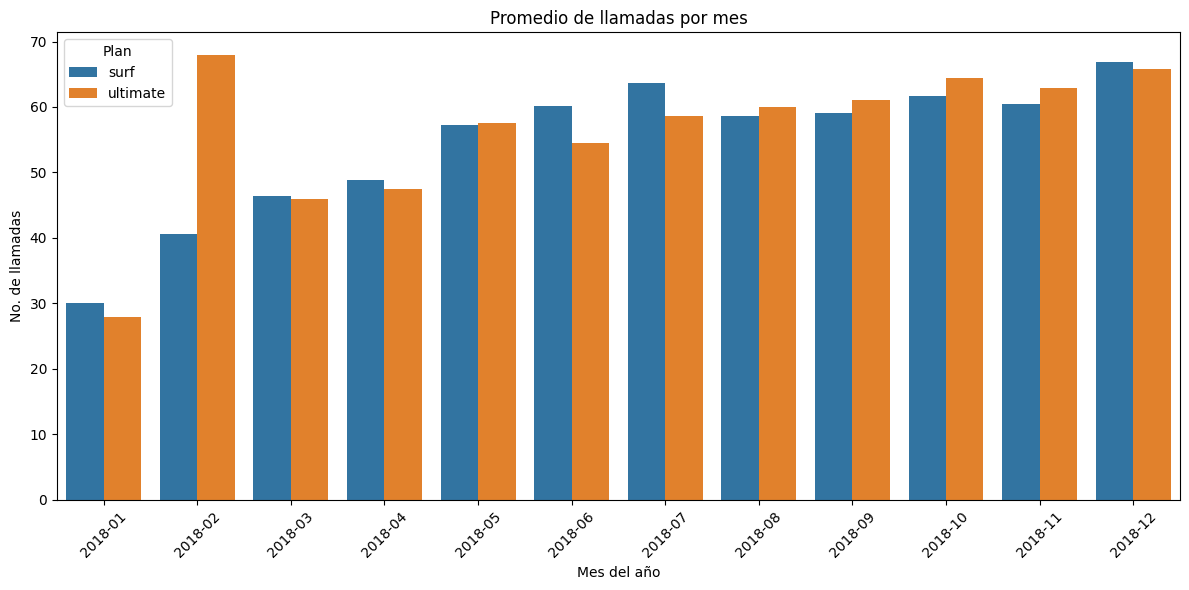

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
promedio_llamadas = df_resume.groupby(["plan_name", "month"])["num_calls"].mean().round(2).reset_index()
promedio_llamadas.rename(columns={"num_calls": "promedio_llamadas"}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=promedio_llamadas, x="month", y="promedio_llamadas", hue="plan_name")
plt.title("Promedio de llamadas por mes")
plt.xlabel("Mes del año")
plt.ylabel("No. de llamadas")
plt.xticks(rotation=45)
plt.legend(title="Plan")
plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes
</div>


No handles with labels found to put in legend.


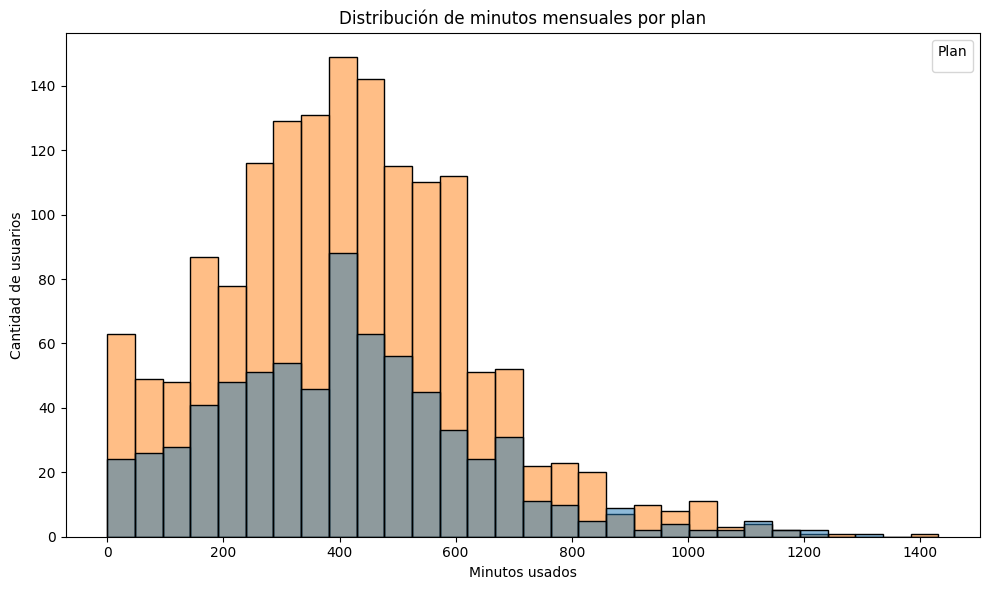

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
cantidad_minutos = df_resume.groupby(["user_id", "month", "plan_name"])["used_minutes"].sum().round(2).reset_index()
cantidad_minutos.rename(columns={"used_minutes": "minutos_usados"}, inplace=True)

plt.figure(figsize=(10, 6))

sns.histplot(
    data=cantidad_minutos,
    x="minutos_usados",
    hue="plan_name",
    bins=30
)

plt.title("Distribución de minutos mensuales por plan")
plt.xlabel("Minutos usados")
plt.ylabel("Cantidad de usuarios")
plt.legend(title="Plan")
plt.tight_layout()
plt.show()

#No logro comprender del todo que significa la leyenda que me arroja debajo de "No handles with labels found to put in legend", ya intente cambiar el tipo de la columna "plan_name" a string, pero ni siendo string ni objeto me lo soluciona, tambien ya probe con unique para ver si es que hay algun error con las etiquetas y tuviera valores nulos pero no los tengo"

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
estadisticas_llamadas = cantidad_minutos.groupby("plan_name")["minutos_usados"].agg(["mean", "var"]).round(2)
estadisticas_llamadas.rename(columns={"mean": "media", "var": "varianza"}, inplace=True)

# Mostrar resultados
print(estadisticas_llamadas)

            media  varianza
plan_name                  
surf       412.10  47001.25
ultimate   410.18  50510.63


In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media = cantidad_minutos["minutos_usados"].mean()
varianza = cantidad_minutos["minutos_usados"].var()

print(f"Media mensual de duración de llamadas: {media:.2f} minutos")
print(f"Varianza mensual de duración de llamadas: {varianza:.2f} minutos²")


Media mensual de duración de llamadas: 411.49 minutos
Varianza mensual de duración de llamadas: 48088.30 minutos²


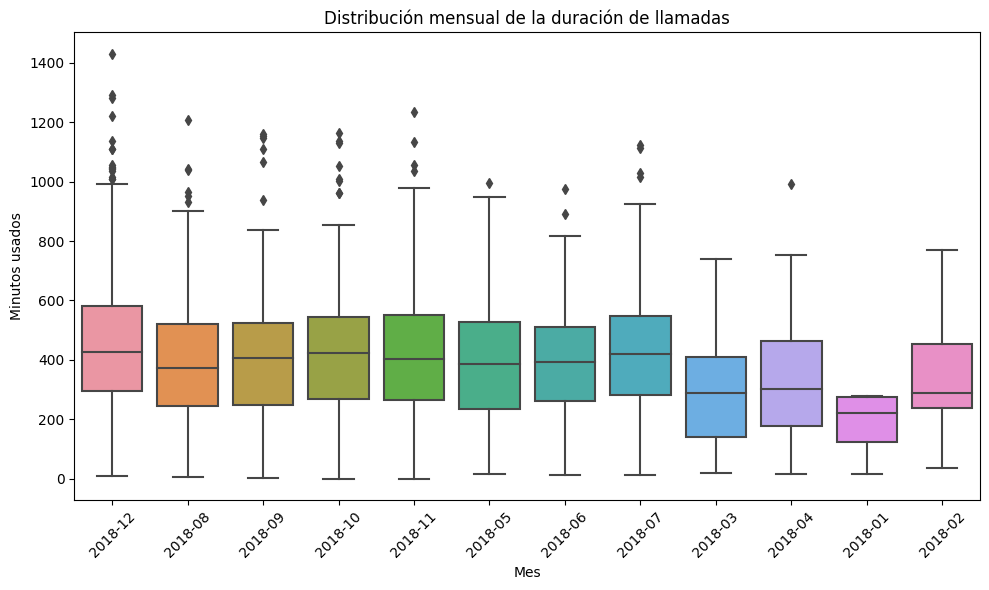

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
cantidad_minutos_1 = df_resume.groupby(["user_id", "month"])["used_minutes"].sum().round(2).reset_index()
plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="used_minutes", data=cantidad_minutos_1)
plt.title("Distribución mensual de la duración de llamadas")
plt.xlabel("Mes")
plt.ylabel("Minutos usados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Pareciera haber una tendencia a utilizar mas los minutos para llamadas en el plan Ultimate que en el plan Surf, apreciando que la media de minutos por mes se encuentra aproximadamente en los 400 minutos pero el numero de usuarios que registraron este consumo fueron casi el doble en el plan ultimate que en el plan surf, pareciera que si es clara la tendencia a usar mas minutos si se encuentran en el plan ultimate.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los diagramas de caja nos permiten ver la distribución de ambos conjuntos de datos de una manera clara

</div>


### Mensajes

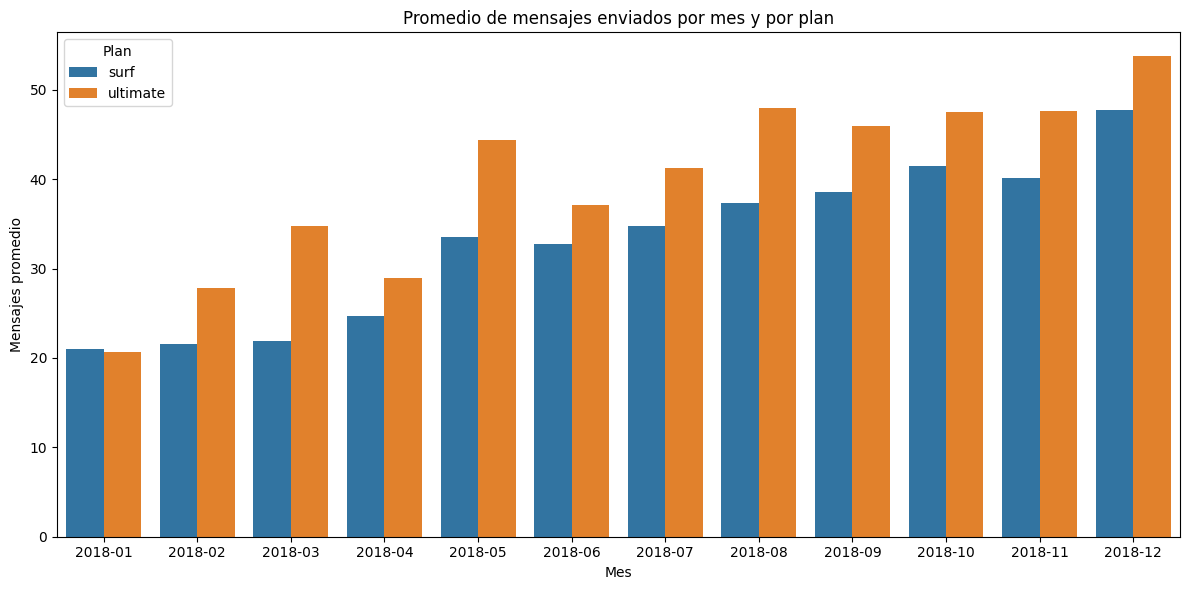

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_mensuales = df_resume.groupby(["plan_name", "month"])["sent_messages"].mean().round(2).reset_index()
mensajes_mensuales.rename(columns={"sent_messages": "promedio_mensajes"}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=mensajes_mensuales, x="month", y="promedio_mensajes", hue="plan_name")

plt.title("Promedio de mensajes enviados por mes y por plan")
plt.xlabel("Mes")
plt.ylabel("Mensajes promedio")
plt.legend(title="Plan")
plt.tight_layout()
plt.show()


In [37]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
trafico_internet = df_resume.groupby(["plan_name", "month"])["total_gb_used"].mean().round(2).reset_index()
trafico_internet.rename(columns={"total_gb_used": "promedio_gb_usados"}, inplace=True)

trafico_internet.sample(10)


,plan_name,month,promedio_gb_usados
19,ultimate,2018-08,17.40
5,surf,2018-06,15.27
22,ultimate,2018-11,16.60
21,ultimate,2018-10,17.36
20,ultimate,2018-09,16.58
12,ultimate,2018-01,6.76
13,ultimate,2018-02,17.49
0,surf,2018-01,4.76
9,surf,2018-10,17.06
3,surf,2018-04,11.94


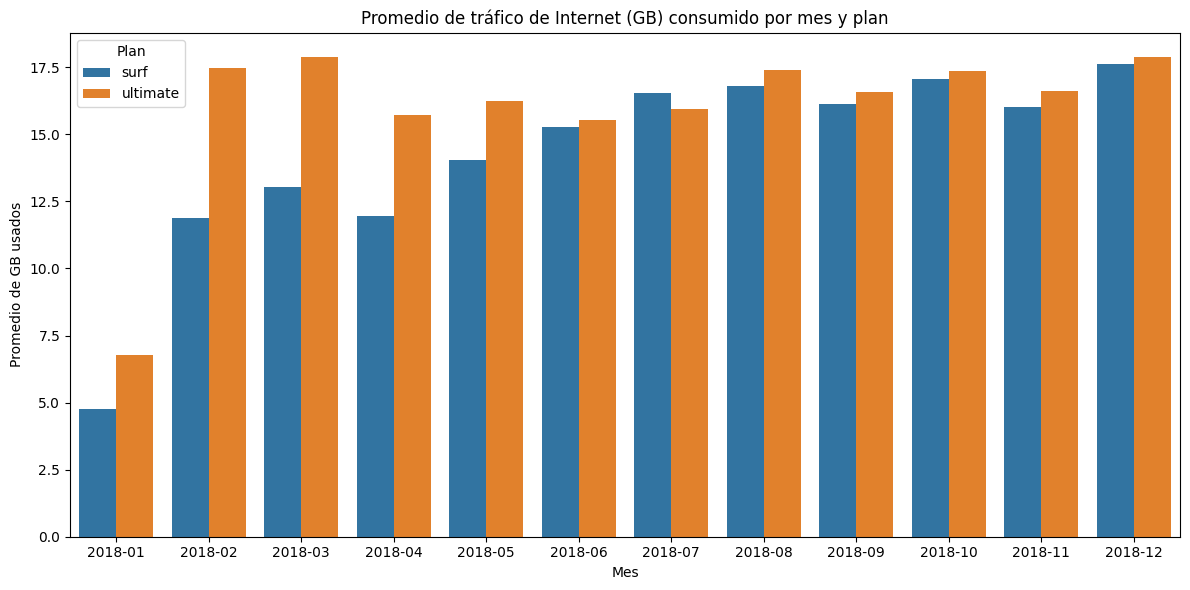

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=trafico_internet, x="month", y="promedio_gb_usados", hue="plan_name")

plt.title("Promedio de tráfico de Internet (GB) consumido por mes y plan")
plt.xlabel("Mes")
plt.ylabel("Promedio de GB usados")
plt.legend(title="Plan")
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

No parece existir un claro margen entre el uso de mensajes de un plan y el otro, aunque hay un par de meses que claramente el plan ultimate tiene un mayor consumo que el plan surf, los demas meses se mantienen en un orden muy similar, indicando que el tipo de plan no tiene influencia directa en cuanto a los mensajes enviados por los clientes registrados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buenas observaciones, buena manera de pensar en como se pueden aplicar estos conocimientos a casos útiles y reales
</div>


### Internet

In [39]:
estadisticas_internet = df_resume.groupby("plan_name")["total_gb_used"].agg(["mean", "var"]).round(2)
estadisticas_internet.rename(columns={"mean": "media", "var": "varianza"}, inplace=True)
print(estadisticas_internet)

           media  varianza
plan_name                 
surf       16.28     56.74
ultimate   16.87     57.43


In [40]:
media = trafico_internet["promedio_gb_usados"].mean()
varianza = trafico_internet["promedio_gb_usados"].var()

print(f"Media mensual de gb consumidos es de: {media:.2f} gb")
print(f"Varianza mensual de gb consumidos es de : {varianza:.2f} gb²")


Media mensual de gb consumidos es de: 15.11 gb
Varianza mensual de gb consumidos es de : 11.21 gb²


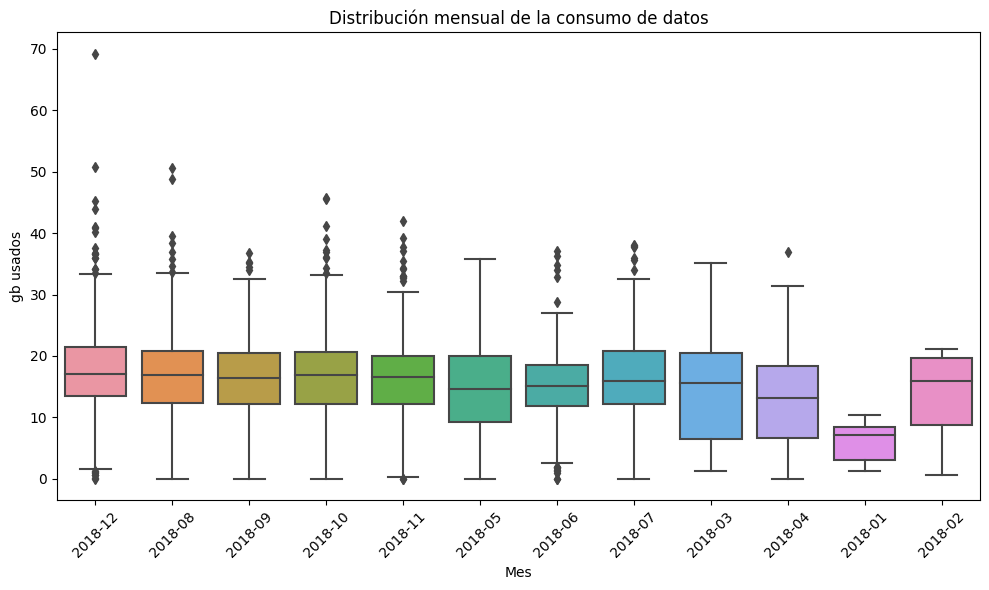

In [41]:
trafico_internet_1 = df_resume.groupby(["user_id", "month"])["total_gb_used"].sum().round(2).reset_index()
plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="total_gb_used", data=trafico_internet_1)
plt.title("Distribución mensual de la consumo de datos")
plt.xlabel("Mes")
plt.ylabel("gb usados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

El consumo de internet pareciera tener una media similar para todo el año sin importar si es un plan surf o un plan ultimate, teniendo eventos fuera de lo normal en la mayoria de los meses lo que indica que un sector de los usuarios si hacen un uso muy fuera del rango promedio de la poblacion total de clientes

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Gracias a estos analisis podemos crear nuevas estrategias para optimizar los planes y dar un mayor beneficio a cambio de mejores ingresos
</div>


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [42]:
estadisticas_ingreso = df_mensual.groupby("plan_name")["ingreso_total"].agg(["mean", "var"]).round(2)
estadisticas_ingreso.rename(columns={"mean": "media", "var": "varianza"}, inplace=True)
print(estadisticas_ingreso)

           media  varianza
plan_name                 
surf       56.88   2686.96
ultimate   72.06    109.96


In [43]:
media = df_mensual["ingreso_total"].mean()
varianza = df_mensual["ingreso_total"].var()

print(f"Media mensual de ingresos es: {media:.2f} USD")
print(f"Varianza mensual de ingresos es: {varianza:.2f} USD²")

Media mensual de ingresos es: 61.88 USD
Varianza mensual de ingresos es: 1889.07 USD²


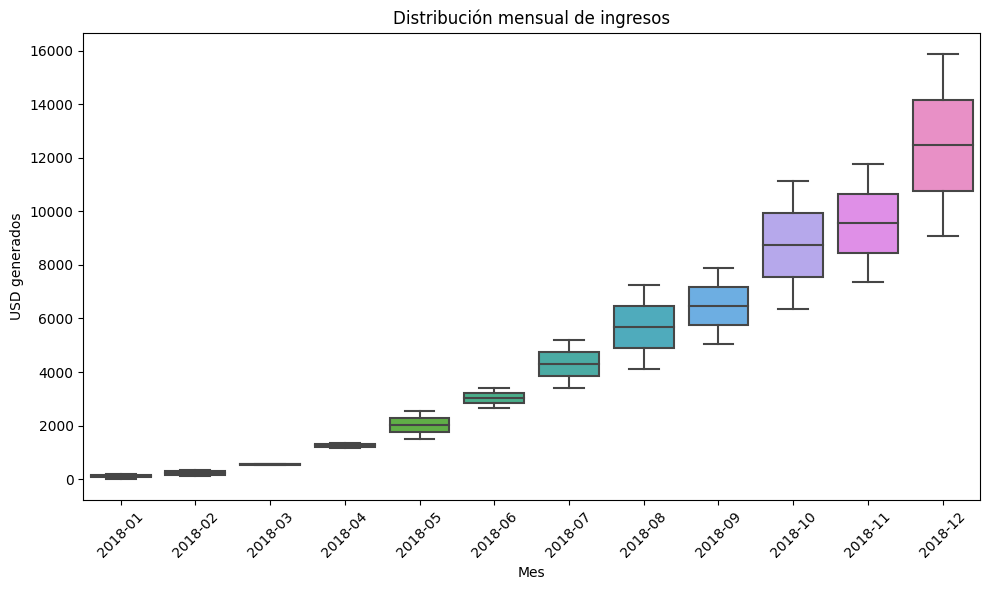

In [44]:
nivel_ingresos = df_mensual.groupby(["month", "plan_name"])["ingreso_total"].sum().round(2).reset_index()
plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="ingreso_total", data=nivel_ingresos)
plt.title("Distribución mensual de ingresos")
plt.xlabel("Mes")
plt.ylabel("USD generados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Esta grafica nos indica que conforme fueron avanzando los meses del año el nivel de ingresos fue aumentando considerablemente, esto puede deberse a que con el paso del tiempo, se han ido agregando cada vez mas clientes al servicio, implicando un incremento considerable en el dinero generado cada mes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

En la grafica que creas podemos ver los cambios en el ingreso a lo largo del año, te dejo un ejemplo donde podemos comparar el ingreso del año según el plan
</div>


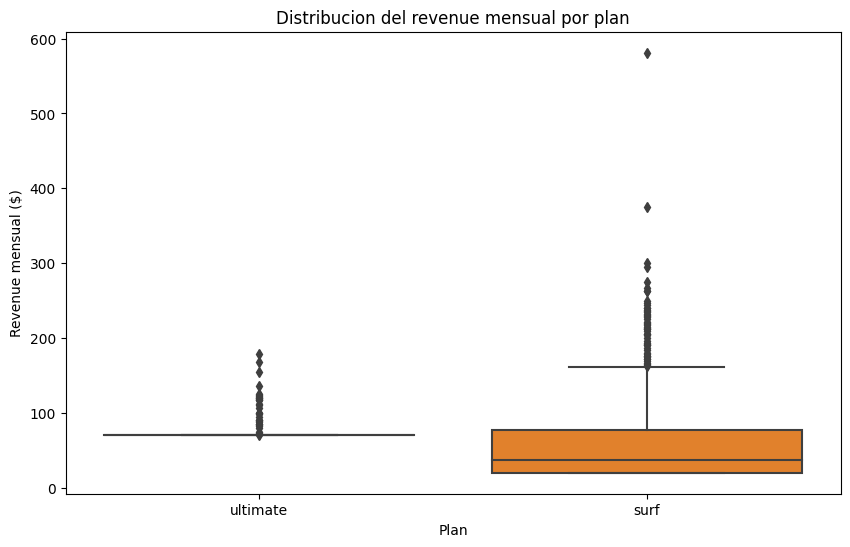

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mensual, x='plan_name', y='ingreso_total')

plt.title('Distribucion del revenue mensual por plan')
plt.xlabel('Plan')
plt.ylabel('Revenue mensual ($)')
plt.show()

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [49]:
# Prueba las hipótesis
surf = df_mensual[df_mensual["plan_name"] == "surf"]["ingreso_total"].dropna().astype(float)
ultimate = df_mensual[df_mensual["plan_name"] == "ultimate"]["ingreso_total"].dropna().astype(float)
alpha = 0.05
result = ttest_ind(surf, ultimate)

print(result.pvalue ) #(prueba de 2 colas)

if(result.pvalue < alpha): 
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa en los ingresos.")

4.284761948800155e-12
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [50]:
# Prueba las hipótesis
df_users_region = df_users[["user_id","state(s)"]]
df_ingreso_region = pd.merge(df_mensual,df_users_region, on="user_id",how="left")

alpha = 0.05

ny_nj = df_ingreso_region[df_ingreso_region["state(s)"].str.contains("NY-NJ", na=False)]["ingreso_total"].dropna().astype(float)
otras = df_ingreso_region[~df_ingreso_region["state(s)"].str.contains("NY-NJ", na=False)]["ingreso_total"].dropna().astype(float)
result = ttest_ind(ny_nj, otras)

print(result.pvalue)

if(result.pvalue < alpha): 
    print("Rechazamos la hipótesis nula: los ingresos promedio si son diferentes.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia de diferencia en ingresos promedio")

0.0058600362668102405
Rechazamos la hipótesis nula: los ingresos promedio si son diferentes.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1.- Estadisticamente el ingreso en USD incrementa con el pasar de los meses indicando un incremento en el numero de usuarios de los servicios

2.- el consumo promedio de los usuarios es muy similar en promedio para navegacion y uso de mensajes de un plan a otro, pero es muy notable la diferencia del uso de los minutos entre un plan y otro, en ambos casos hay 

3.- a pesar de que los promedios estan muy similares, existen usuarios que tienen consumos muy fuera del promedio generando un incremento considerable en los promedios de las estadisticas.

4.- de la misma manera, recurrentemente los usuarios exceden el limite de sus planes aunque sea por un minimo, habiendo las excepciones donde algunos usuarios llegan a excederlo de manera considerable dando a entender que es pos eventos aislados donde tuvieron que consumirlo.

5.- los promedios de ingreso de cada uno de los planes son diferentes, principalmente debido a los costos de los mismos

6.- la zona tambien influye, demostrando que la region de NY-NJ tiene un ingreso promedio diferente al resto de regiones, en este caso podria indicar que el numero de usuarios en esa region es considerablemente diferene al numero de usuarios en las demas regiones

Resumen: Ambos planes generan ingresos diferentes por la naturaleza del cobro mensual que generan, los usuarios incrementaron conforme pasa el tiempo, incrementando de esta manera los ingresos generales, la region ny-nj tiene una diferencia de usuarios considerable con respecto a las otras regiones haciendo notable la diferencia en los ingresos que genera, los usuarios presentan similitudes en sus costumbres de consumo, y tienden a realizar mas llamadas cuando tienen el plan ultimate, el cual tiene un limite superior de minutos realmente alto, no es necesario hacer un ajuste en los limites de los planes ya que al parecer no es muy comun que se excedan y cuando llegan a hacerlo, es por poco, excepto por casos aislados donde llega a ser notable, pero en dado caso es preferible hacer un ajuste de tarifa o limites para esos usuarios especificos con consumos elevados recurrentes.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>
